# Introduction

Reading the file and exploring the data 

In [67]:
import pandas as pd

# Load the data from the Excel file
file_path = 'MLengineer-flash/data/input_data.xlsx'
data = pd.read_excel(file_path)

In [68]:
data.shape

(35138, 3)

In [69]:

# Display the first few rows of the dataset and some basic info
data.head()


,Text,Category,EmailType
0,"Hi *******, Your payment to Uber India was App...",category_3,email_type_93
1,Your Zomato Online Ordering receipt Refund Pro...,category_3,email_type_84
2,Electricity Bill Payment Successful ‚Çπ 979 Fo...,category_3,email_type_3
3,Payment requested by FINCFRIENDS PVT. LTD. Rec...,category_3,email_type_92
4,Greetings from Swiggy Your order was delivered...,category_3,email_type_86


In [70]:
data.describe(include='all')

,Text,Category,EmailType
count,35127,35138,35138
unique,32702,3,143
top,DOWNLOAD APP ORIGINAL PRODUCTS CASH ON DELIVER...,category_3,email_type_138
freq,115,29872,13079


# Exploratory Data Analysis and Data Pre-processing

### Checking for Missing values

In [71]:
data.isnull().sum()

Text         11
Category      0
EmailType     0
dtype: int64

In [72]:
null_indexes = data[data.isnull().any(axis=1)].index
import pandas as pd
null_data = data.loc[null_indexes, ['Category', 'EmailType']]
print(null_data.to_string(index=True))



         Category       EmailType
30351  category_1  email_type_138
31014  category_1  email_type_138
31558  category_1  email_type_138
31904  category_1  email_type_138
32509  category_1  email_type_138
32624  category_1  email_type_138
32636  category_1  email_type_138
33455  category_1  email_type_138
33847  category_1  email_type_138
34510  category_1  email_type_138
34564  category_1  email_type_138


Here it is evident that only the mails from category_1 and email_type_138 have the mails with no text. But on analysing the entire dataset it is also evident that the email_type_138 has the most frequency, hence removing these 11 values from the dataset should be safe and wouldn't be causing any impact on our final result

In [73]:
# Remove rows with null values based on the indexes
data = data.drop(null_indexes)

# Reset the index
data = data.reset_index(drop=True)

null_indexes = data[data.isnull().any(axis=1)].index
null_data = data.loc[null_indexes, ['Category', 'EmailType']]
print(null_data.to_string(index=True))

Empty DataFrame
Columns: [Category, EmailType]
Index: []


Now the dataset is free from all the missing values

In [74]:
import pandas as pd

# Count the occurrences of each unique Category
category_counts = data['Category'].value_counts()
print(category_counts)
# Remove Categories with less than 5 examples
rare_categories = category_counts[category_counts < 25].index
data = data[~data['Category'].isin(rare_categories)]

# Count the occurrences of each unique EmailType
emailtype_counts = data['EmailType'].value_counts()

# Remove EmailTypes with less than 5 examples
rare_emailtypes = emailtype_counts[emailtype_counts <= 25].index
data = data[~data['EmailType'].isin(rare_emailtypes)]

# Reset the index
data = data.reset_index(drop=True)

print('-'*50)
print('Below EmailTypes are removed from the dataset as they don\'t contain sufficient examples needed for model building')
print('-'*50)
print("Email types removed due to lack of sufficient data i.e they have <=25 examples:")
for email_type in rare_emailtypes:
    print(email_type)

Category
category_3    29872
category_1     5235
category_2       20
Name: count, dtype: int64
--------------------------------------------------
Below EmailTypes are removed from the dataset as they don't contain sufficient examples needed for model building
--------------------------------------------------
Email types removed due to lack of sufficient data i.e they have <=25 examples:
email_type_58
email_type_123
email_type_126
email_type_68
email_type_20
email_type_94
email_type_41
email_type_122
email_type_107
email_type_135
email_type_81
email_type_43
email_type_8
email_type_141
email_type_39
email_type_32
email_type_105
email_type_102
email_type_76
email_type_33
email_type_34
email_type_12
email_type_53
email_type_9
email_type_22
email_type_73
email_type_67
email_type_65
email_type_14
email_type_13
email_type_48
email_type_115
email_type_75
email_type_103
email_type_15
email_type_6
email_type_131
email_type_35
email_type_27
email_type_66
email_type_88
email_type_5
email_type_62


Removed the data points which represent a very minor population i.e less than 25 examples as the examples are not sufficient to develop good prediction for similar data. Because in the further analysis I have chosen the test size to be 20% of the original data and this transalates to minimum of 5 examples per class in test set which would mean that atleast 25 examples are needed to be present in the representative population. As this is not being satisfied, the data points don't add value in our predictions

Upon inspection the category_2 has only 20 values which is too less compared to category_2 and category_3 and hence as the lack of decent population of atleast 25 examples of the class we can delete the datapoints within the category_2. 

In [75]:
# Check unique EmailType values within the 'category_2' class
unique_email_types_category_2 = data[data['Category'].str.strip() == 'category_2']['EmailType'].unique()
print(unique_email_types_category_2)

[]


But interestingly all the emails of category_2 map to a single email_type i.e email_type_138

In [76]:
# Check unique EmailType values within the 'category_1' class
unique_email_types_category_1 = data[data['Category'].str.strip() == 'category_1']['EmailType'].unique()
print(unique_email_types_category_1)

['email_type_138']


Even the emails belonging to category_1 all map to the same email_type_138. 

In [77]:
# Check unique EmailType values within the 'category_3' class
unique_email_types_category_3 = data[data['Category'].str.strip() == 'category_3']['EmailType'].unique()
print(unique_email_types_category_3)

['email_type_93' 'email_type_84' 'email_type_3' 'email_type_92'
 'email_type_86' 'email_type_138' 'email_type_28' 'email_type_57'
 'email_type_18' 'email_type_25' 'email_type_1' 'email_type_30'
 'email_type_38' 'email_type_118' 'email_type_111' 'email_type_11'
 'email_type_74' 'email_type_44' 'email_type_125' 'email_type_89'
 'email_type_139' 'email_type_78' 'email_type_63' 'email_type_50'
 'email_type_96' 'email_type_91' 'email_type_121' 'email_type_120'
 'email_type_124' 'email_type_60' 'email_type_83' 'email_type_7'
 'email_type_134' 'email_type_127' 'email_type_29' 'email_type_136'
 'email_type_21' 'email_type_2' 'email_type_104' 'email_type_130'
 'email_type_56' 'email_type_116' 'email_type_85' 'email_type_10'
 'email_type_45' 'email_type_97' 'email_type_109' 'email_type_71'
 'email_type_79' 'email_type_87' 'email_type_59' 'email_type_19'
 'email_type_117' 'email_type_40' 'email_type_99' 'email_type_106'
 'email_type_129' 'email_type_132' 'email_type_137' 'email_type_112'
 'email_

Only the category_3 has muliple email_types unlike both category_1 and category_2. And Category_1 has a decent sample size, so we can merge the category_2 to be category_1 as they are only 20 datapoints and mapping to the same email type as category_1 instead of deleting them. 

As per the dataset description, the category_1 maps to Transactional and category_2 maps to Promotional mails, so with this merge its being assumed that Promotional mails could be part of Transactional mails as they both are classified as email_type_138 as per the grund truth. And adding these 20 observations wouldn't create a noticeable mathematical deviation from the distribution of the data. 

In [78]:
data.loc[data['Category'] == 'category_2', 'Category'] = 'category_1'

In [79]:
emailtype_counts = data['EmailType'].value_counts()
emailtype_counts


EmailType
email_type_138    13048
email_type_93      3692
email_type_86      2359
email_type_28      1808
email_type_30      1630
                  ...  
email_type_99        27
email_type_132       27
email_type_109       26
email_type_40        26
email_type_137       26
Name: count, Length: 61, dtype: int64

In [80]:
len(emailtype_counts[emailtype_counts < 1600].index)

56

In [81]:
data.shape

(34477, 3)

In [82]:
data.dropna()


,Text,Category,EmailType
0,"Hi *******, Your payment to Uber India was App...",category_3,email_type_93
1,Your Zomato Online Ordering receipt Refund Pro...,category_3,email_type_84
2,Electricity Bill Payment Successful ‚Çπ 979 Fo...,category_3,email_type_3
3,Payment requested by FINCFRIENDS PVT. LTD. Rec...,category_3,email_type_92
4,Greetings from Swiggy Your order was delivered...,category_3,email_type_86
...,...,...,...
34472,Here are your network highlights Õè Õè Õè Õè Õ...,category_1,email_type_138
34473,"FLAT 30-70% OFF @ Casio, Van Heusen, AND, Only...",category_1,email_type_138
34474,This is a system generated mail so please do n...,category_1,email_type_138
34475,Hey Akshita ! Here's what folks are talking ab...,category_1,email_type_138


In [83]:
data_cleaned1 = data.copy()

In [84]:
data_cleaned1.shape

(34477, 3)

### Text Normalization: 
Convert all text to lower case, remove punctuation, and possibly apply lemmatization.

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import unicodedata

nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()

lemmatizer = nltk.WordNetLemmatizer()

data_cleaned = data.copy()

# Text normalization function with lematization
def normalize_text_lemmatization(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') #removing non-english characters and accents 
    text = re.sub(r'[^a-zA-Z\s]', '', text) #removing special characters and punctuations
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply text normalization with lemmatization
data_cleaned['Lemmatized_text'] = data_cleaned['Text'].apply(normalize_text_lemmatization)


[nltk_data] Downloading package punkt to /Users/Srimouli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Srimouli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
data_cleaned.shape

(34477, 4)

### Data Transformation: 
For modeling, we can transform the text data using the techniques like TF-IDF.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(data_cleaned['Lemmatized_text'])

tfidf_features.shape  # Display the shape of the TF-IDF matrix

(34477, 1000)

## Most common words in the dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Srimouli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


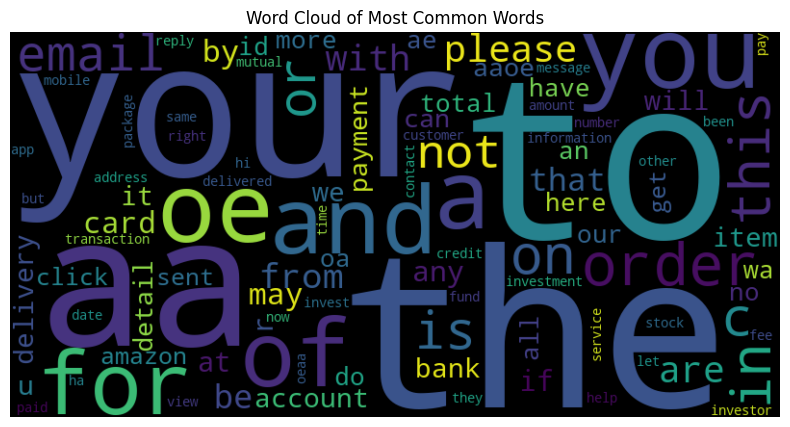

In [88]:
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Get word frequencies
all_words = ' '.join(data_cleaned['Lemmatized_text']).split()
word_freq = Counter(all_words)

# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

## Data Cleaning and Final Data preparation

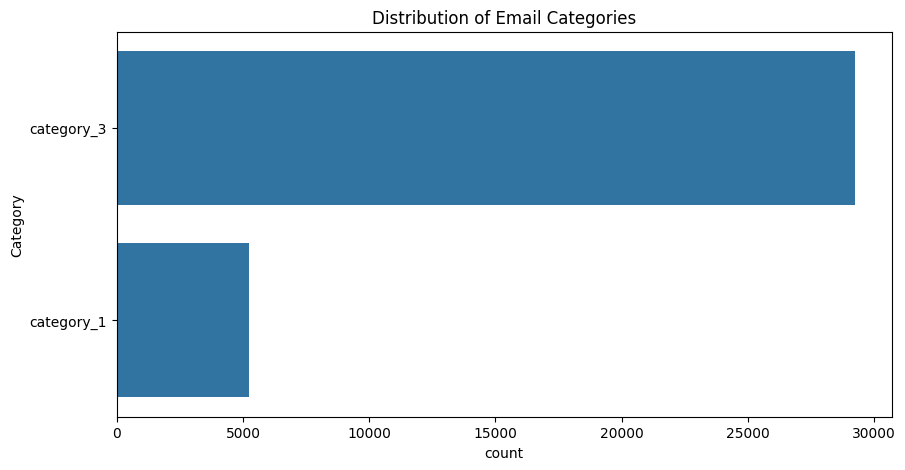

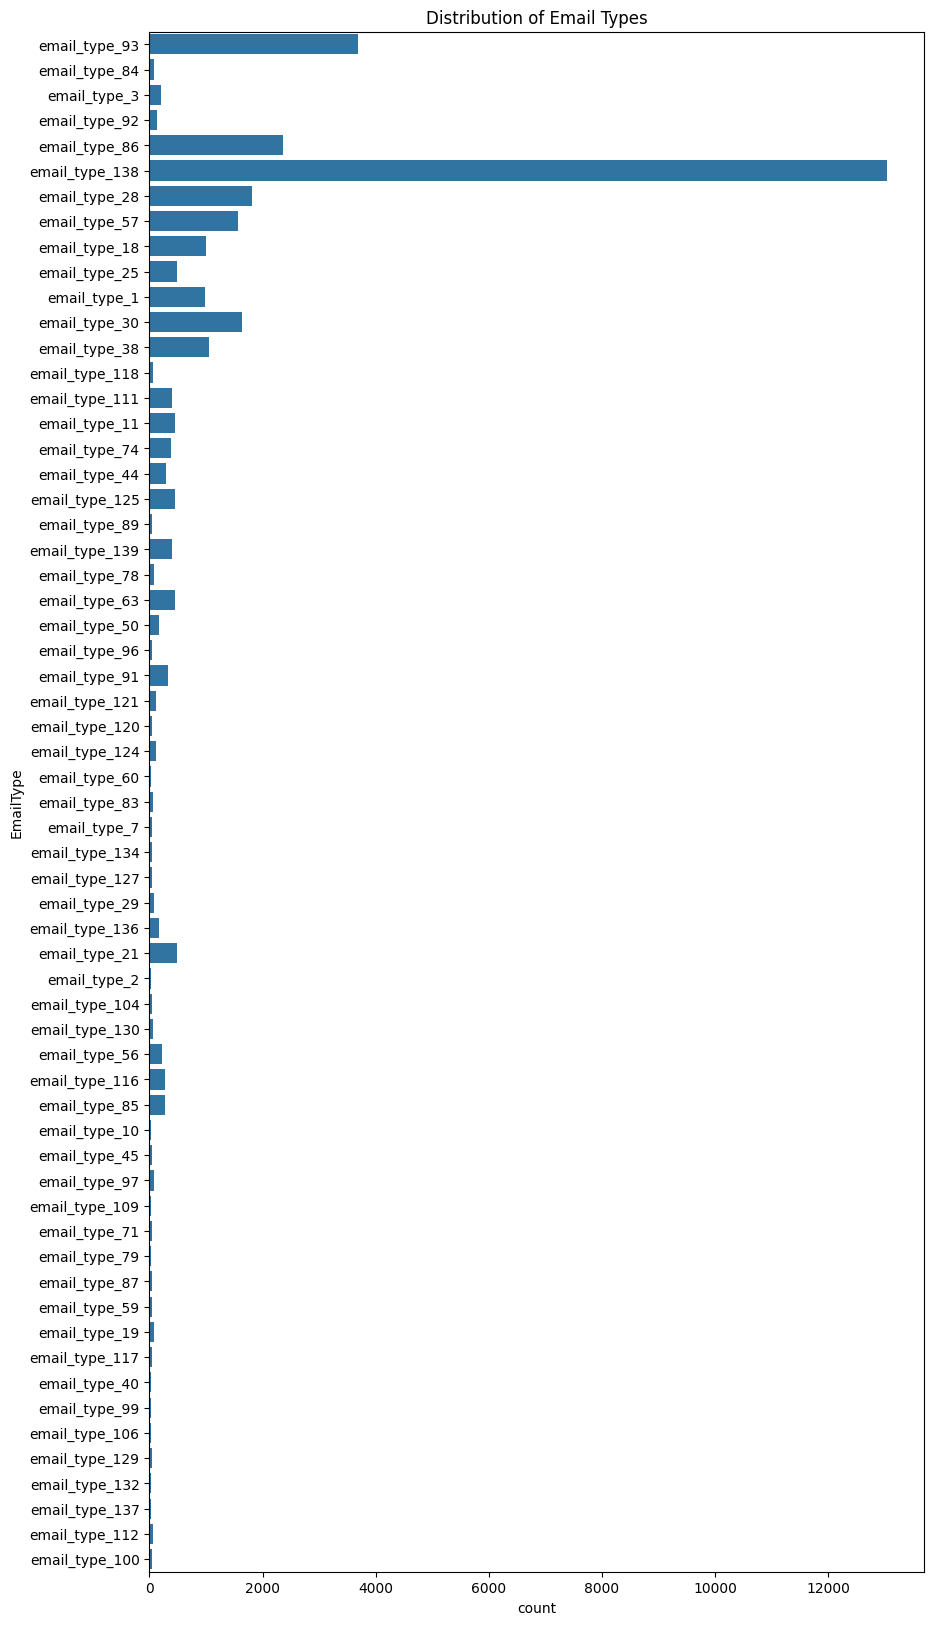

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(data_cleaned['Category'])
plt.title('Distribution of Email Categories')
plt.show()

# Visualize the distribution of email types
plt.figure(figsize=(10, 20))
sns.countplot(data_cleaned['EmailType'])
plt.title('Distribution of Email Types')
plt.show()


Its an imbalanced dataset and hence the models chosen should be able to handle the bias efficiently. The category-2 has been completely eliminated because, in the given dataset there are only 20 data points related to category-2 which is a very minor represenation of the sample and hence the datapoints have been pruned as they don't satisfy the condition of atleast 25 examples per class.

Also from the above it is evident that there is a huge class imbalance between the class email_type_138 as it has highest data points with 13059 examples while there are 33 classes with less than 100 datapoints per class and there are about 56 classes which have less than 1600 data points per class. 

The Majority class is almost 38% of the entire dataset. And is almost 3.5x times the second majority class. So it is most likely that the classifier could be more biased towards predicting the email_type_138 class.

If we check the category class the dataset is having a great imbalance as the category 3 is almost 5.7 times the category 2 

In [90]:
# Check unique EmailType values within the 'category_1' class
unique_email_types_category_1 = data_cleaned[data_cleaned['Category'].str.strip() == 'category_1']['EmailType'].unique()
print(unique_email_types_category_1)

['email_type_138']


From the above its evident that the category_1 datapoints in the dataset belong to only email_type_138 . So as per the scenario of the dataset it is a pragmatic decision to choose undersampling so as to maintain a healthy class imabalance so that we can minimize the over fitting scenario. But the challenge is if we under sample by selecting random datapoints from the email_type_138, there is a risk that we may loose category_1 data points

So here we have two ways to go at this problem, as its clearly evident from this dataset that we don't have any other class that could be predicted for mails from category_1 except email_type_138, we can straightaway say that whenever we are able to classify the category as category_1 the corresponding email type is email_type_138. And when category is classified as category_3 then we can need to have a probability of  multiple email types. 

Therefore we'll prepare two seperate models one to classify the category, and other to classify the email type based on the text. This way we can get a model with better accuracy, in the final prediction. The model will be served on a Torchserve endpoint so that to test the model only the endpoint could be hit. 

In [91]:
email_type_counts = data_cleaned['EmailType'].value_counts()
print(email_type_counts)

EmailType
email_type_138    13048
email_type_93      3692
email_type_86      2359
email_type_28      1808
email_type_30      1630
                  ...  
email_type_99        27
email_type_132       27
email_type_109       26
email_type_40        26
email_type_137       26
Name: count, Length: 61, dtype: int64


Hence the Final Dataset for model building has 2 Categories viz., Category_1 i.e Transactional emails which include promotional emails as well and Category_3 Personal Emails. And the there are 61 email types that can be decently to be classified. 

# Model Development

## Model for predicting Category

In [92]:
data_cleaned.head()

,Text,Category,EmailType,Lemmatized_text
0,"Hi *******, Your payment to Uber India was App...",category_3,email_type_93,hi your payment to uber india wa approved paid...
1,Your Zomato Online Ordering receipt Refund Pro...,category_3,email_type_84,your zomato online ordering receipt refund pro...
2,Electricity Bill Payment Successful ‚Çπ 979 Fo...,category_3,email_type_3,electricity bill payment successful c for cent...
3,Payment requested by FINCFRIENDS PVT. LTD. Rec...,category_3,email_type_92,payment requested by fincfriends pvt ltd recei...
4,Greetings from Swiggy Your order was delivered...,category_3,email_type_86,greeting from swiggy your order wa delivered i...


In [93]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned['Lemmatized_text']
y = data_cleaned['Category']

# Split the dataset into train and combined test/validation sets (80% train, 20% combined test/validation)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the combined test/validation set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

# Print the sizes of train, test, and validation sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Validation set size:", X_val.shape[0])


Train set size: 27581
Test set size: 3448
Validation set size: 3448


In [94]:
#data_cleaned.drop(['Text'],axis=1)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [95]:
import joblib
# Assuming 'tfidf_vectorizer' is your trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'model1/tfidf_vectorizer.pkl')

['model1/tfidf_vectorizer.pkl']

Using Only two models LogisticRegression and RandomClassifier due to compute constraints

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Initialize multiple classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
neural_network = MLPClassifier()

# Create a dictionary to hold the classifiers
classifiers = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Neural Network': neural_network
}

# Print the initialized classifiers
for name, clf in classifiers.items():
    print(f"{name}: {clf}")


Logistic Regression: LogisticRegression()
Random Forest: RandomForestClassifier()
Gradient Boosting: GradientBoostingClassifier()
Neural Network: MLPClassifier()


## Model Evaluation

In [97]:
import time
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Dictionary to store the best models and their parameters
best_models = {}

start_time = time.time()  # Start timing the entire process

# Training each selected model and performing hyperparameter tuning
for name, clf in tqdm(classifiers.items(), desc="Training models", unit="model"):
    model_start_time = time.time()  # Time the training of each model
    print(f"Starting training and hyperparameter tuning for {name}.")

    if name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']:
        param_grid = {}

        if name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10]}  # Reduced complexity
        elif name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 150],  # Reduced number of estimators for speed
                'max_depth': [10, 20],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'max_features': ['sqrt', 'log2']
            }
        elif name == 'Gradient Boosting':
            param_grid = {
                'n_estimators': [100],  # Reduced to a single, most common choice
                'learning_rate': [0.1],  # Simplified to the most impactful value
                'max_depth': [5],  # Opted for a mid-range depth
                'min_samples_split': [5],
                'min_samples_leaf': [2]
            }
        elif name == 'Neural Network':
            param_grid = {
                'hidden_layer_sizes': [(100,)],  # Single layer to reduce complexity
                'activation': ['relu'],  # Common choice for activation
                'solver': ['adam'],  # Efficient solver
                'alpha': [0.001]  # Common regularization strength
            }

        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_tfidf, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Completed GridSearchCV for {name}. Best parameters found: {grid_search.best_params_}")
    else:
        print(f"No hyperparameter tuning needed for {name}. Fitting model directly.")
        clf.fit(X_train_tfidf, y_train)
        best_models[name] = clf

    print(f"Finished processing {name}. Time taken: {time.time() - model_start_time:.2f} seconds.")

# Evaluate the best models on the validation set
validation_scores = {}
print("Evaluating models on validation data.")
evaluation_start_time = time.time()
for name, model in best_models.items():
    y_pred = model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    validation_scores[name] = accuracy

print(f"Model evaluation completed. Time taken: {time.time() - evaluation_start_time:.2f} seconds.")

# Print the validation scores
print("Validation scores:")
for name, score in validation_scores.items():
    print(f"{name}: {score}")

total_time = time.time() - start_time
print(f"Total time for training and evaluation: {total_time:.2f} seconds.")


Training models:   0%|          | 0/4 [00:00<?, ?model/s]

Starting training and hyperparameter tuning for Logistic Regression.


Training models:  25%|██▌       | 1/4 [00:01<00:04,  1.66s/model]

Completed GridSearchCV for Logistic Regression. Best parameters found: {'C': 10}
Finished processing Logistic Regression. Time taken: 1.66 seconds.
Starting training and hyperparameter tuning for Random Forest.


Training models:  50%|█████     | 2/4 [00:55<01:04, 32.41s/model]

Completed GridSearchCV for Random Forest. Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Finished processing Random Forest. Time taken: 53.93 seconds.
Starting training and hyperparameter tuning for Gradient Boosting.


Training models:  75%|███████▌  | 3/4 [02:57<01:13, 73.13s/model]

Completed GridSearchCV for Gradient Boosting. Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Finished processing Gradient Boosting. Time taken: 121.59 seconds.
Starting training and hyperparameter tuning for Neural Network.


Training models: 100%|██████████| 4/4 [03:39<00:00, 54.99s/model]

Completed GridSearchCV for Neural Network. Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Finished processing Neural Network. Time taken: 42.76 seconds.
Evaluating models on validation data.
Model evaluation completed. Time taken: 0.12 seconds.
Validation scores:
Logistic Regression: 0.9872389791183295
Random Forest: 0.99622969837587
Gradient Boosting: 0.9965197215777262
Neural Network: 0.9924593967517401
Total time for training and evaluation: 220.07 seconds.


In [98]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tabulate import tabulate

def evaluate_models(best_models, X_test_tfidf, y_test):
    """
    Evaluate the best models on the test set and print the evaluation metrics in a tabular format.

    Args:
        best_models (dict): A dictionary containing the best models, where the keys are model names and values are model objects.
        X_test_tfidf (sparse matrix): Test data in TF-IDF format.
        y_test (pandas.Series or numpy.ndarray): True labels for the test data.

    Returns:
        None
    """
    # Dictionary to store the evaluation metrics for each model
    test_scores = {}

    # Evaluate the best models on the test set
    for name, model in best_models.items():
        y_pred = model.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        report = classification_report(y_test, y_pred)
        matrix = confusion_matrix(y_test, y_pred)

        test_scores[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Classification Report': report,
            'Confusion Matrix': matrix
        }

    # Store the evaluation metrics in a list of lists
    table_data = []
    for name, scores in test_scores.items():
        table_data.append([name,
                           f"{scores['Accuracy']:.4f}",
                           f"{scores['Precision']:.4f}",
                           f"{scores['Recall']:.4f}",
                           f"{scores['F1 Score']:.4f}",
                           scores['Classification Report'],
                           scores['Confusion Matrix']])

    # Define the headers for the table
    headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Classification Report", "Confusion Matrix"]

    # Print the table
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

In [99]:
evaluate_models(best_models, X_test_tfidf, y_test)

+---------------------+------------+-------------+----------+------------+-------------------------------------------------------+--------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score | Classification Report                                 | Confusion Matrix   |
+=====================+============+=============+==========+============+=======================================================+====================+
| Logistic Regression |     0.989  |      0.9889 |   0.989  |     0.989  | precision    recall  f1-score   support               | [[ 502   21]       |
|                     |            |             |          |            |                                                       |  [  17 2908]]      |
|                     |            |             |          |            |   category_1       0.97      0.96      0.96       523 |                    |
|                     |            |             |          |            |   category_3 

## Saving Category model

In [101]:
from joblib import dump

# Store the best models
for name, model in best_models.items():
    dump(model, f"/Users/Srimouli/Documents/experiments/Flash/MLengineer-flash/src/models/category/{name}_model_category.joblib")

## Model for predicting EmailType

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned['Lemmatized_text']
y = data_cleaned['EmailType']

# Split the dataset into train and combined test/validation sets (80% train, 20% combined test/validation)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the combined test/validation set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

# Print the sizes of train, test, and validation sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Validation set size:", X_val.shape[0])

# Vectorize the text data using TF-IDF
#data_cleaned.drop(['Text'],axis=1)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Initialize multiple classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Dictionary to store classifiers and their hyperparameter grids

# Create a dictionary to hold the classifiers
classifiers = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    }

# Print the initialized classifiers
for name, clf in classifiers.items():
    print(f"{name}: {clf}")

Train set size: 27581
Test set size: 3448
Validation set size: 3448
Logistic Regression: LogisticRegression()
Random Forest: RandomForestClassifier()


In [108]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time
from tqdm import tqdm

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned['Lemmatized_text']
y = data_cleaned['EmailType']

# Split the dataset into train and combined test/validation sets (80% train, 20% combined test/validation)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the combined test/validation set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

# Print the sizes of train, test, and validation sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Validation set size:", X_val.shape[0])

# Vectorize the text data using TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Save the TF-IDF vectorizer
#joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')

# Initialize multiple classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
neural_network = MLPClassifier()

# Create a dictionary to hold the classifiers
classifiers = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Neural Network': neural_network,
}

# Print the initialized classifiers
for name, clf in classifiers.items():
    print(f"{name}: {clf}")

# Dictionary to store the best models and their parameters
best_models_et = {}

start_time = time.time()  # Start timing the entire process

# Training each selected model and performing hyperparameter tuning
for name, clf in tqdm(classifiers.items(), desc="Training models", unit="model"):
    model_start_time = time.time()  # Time the training of each model
    print(f"Starting training and hyperparameter tuning for {name}.")

    if name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']:
        param_grid = {}
        if name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10]}  
        elif name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 150],  
                'max_depth': [10, 20],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'max_features': ['sqrt', 'log2']
            }
        elif name == 'Neural Network':
            param_grid = {
                'hidden_layer_sizes': [(50,)],  
                'activation': ['relu'],  
                'solver': ['adam'],  # Efficient solver
                'alpha': [0.001]  
            }

        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_tfidf, y_train)
        best_models_et[name] = grid_search.best_estimator_
        print(f"Completed GridSearchCV for {name}. Best parameters found: {grid_search.best_params_}")

    else:
        print(f"No hyperparameter tuning needed for {name}. Fitting model directly.")
        clf.fit(X_train_tfidf, y_train)
        best_models_et[name] = clf

    print(f"Finished processing {name}. Time taken: {time.time() - model_start_time:.2f} seconds.")

# Save the trained models
for name, model in best_models_et.items():
    joblib.dump(model, f'models/{name.replace(" ", "_").lower()}_model.pkl')

# Evaluate the best models on the validation set
validation_scores = {}
print("Evaluating models on validation data.")
evaluation_start_time = time.time()
for name, model in best_models_et.items():
    y_pred = model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    validation_scores[name] = accuracy

print(f"Model evaluation completed. Time taken: {time.time() - evaluation_start_time:.2f} seconds.")

# Print the validation scores
print("Validation scores:")
for name, score in validation_scores.items():
    print(f"{name}: {score}")

total_time = time.time() - start_time
print(f"Total time for training and evaluation: {total_time:.2f} seconds.")


Train set size: 27581
Test set size: 3448
Validation set size: 3448
Logistic Regression: LogisticRegression()
Random Forest: RandomForestClassifier()
Neural Network: MLPClassifier()


Training models:   0%|          | 0/3 [00:00<?, ?model/s]

Starting training and hyperparameter tuning for Logistic Regression.


/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training models:  33%|███▎      | 1/3 [00:17<00:35, 17.64s/model]

Completed GridSearchCV for Logistic Regression. Best parameters found: {'C': 10}
Finished processing Logistic Regression. Time taken: 17.64 seconds.
Starting training and hyperparameter tuning for Random Forest.


Training models:  67%|██████▋   | 2/3 [01:48<01:00, 60.48s/model]

Completed GridSearchCV for Random Forest. Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Finished processing Random Forest. Time taken: 90.46 seconds.
Starting training and hyperparameter tuning for Neural Network.


/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Training models: 100%|██████████| 3/3 [02:44<00:00, 54.79s/model]

Completed GridSearchCV for Neural Network. Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Finished processing Neural Network. Time taken: 56.26 seconds.
Evaluating models on validation data.
Model evaluation completed. Time taken: 0.09 seconds.
Validation scores:
Logistic Regression: 0.9669373549883991
Random Forest: 0.9541763341067285
Neural Network: 0.9762180974477959
Total time for training and evaluation: 164.53 seconds.


In [110]:
from joblib import dump

# Store the best models
for name, model in best_models_et.items():
    dump(model, f"/Users/Srimouli/Documents/experiments/Flash/MLengineer-flash/src/models/emailtype//{name}_model_et.joblib")

In [109]:
evaluate_models(best_models_et, X_test_tfidf, y_test)

/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Srimouli/Documents/experiments/Flash/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

+---------------------+------------+-------------+----------+------------+---------------------------------------------------------+---------------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score | Classification Report                                   | Confusion Matrix          |
+=====================+============+=============+==========+============+=========================================================+===========================+
| Logistic Regression |     0.9664 |      0.9654 |   0.9664 |     0.965  | precision    recall  f1-score   support                 | [[81  0  0 ...  0  0  0]  |
|                     |            |             |          |            |                                                         |  [ 0  3  0 ...  0  0  0]  |
|                     |            |             |          |            |   email_type_1       0.93      0.83      0.88        98 |  [ 0  0  4 ...  0  0  0]  |
|                     |           